# Create Contour Map 

In [1]:
from osgeo import gdal 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

In [2]:
filename = 'output_srtm.tif'
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array 
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

array([[567., 573., 577., ..., 497., 491., 488.],
       [567., 572., 577., ..., 491., 488., 486.],
       [563., 566., 569., ..., 493., 491., 489.],
       ...,
       [672., 665., 655., ..., 509., 500., 485.],
       [670., 662., 654., ..., 493., 487., 482.],
       [660., 649., 639., ..., 486., 481., 478.]])

In [3]:
# replace missing values 

if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

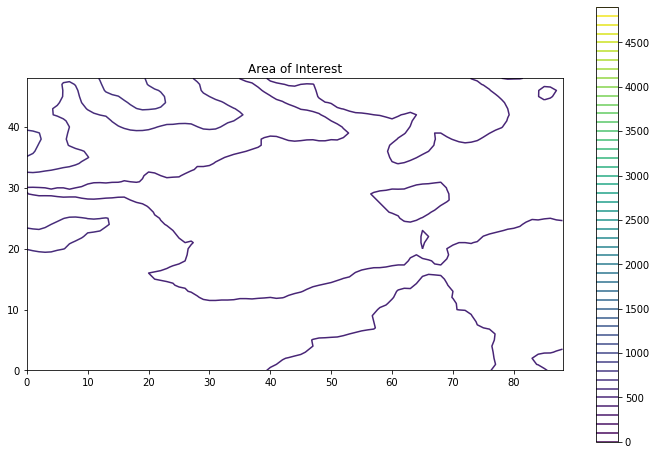

In [4]:
# Visualize Data with Matplotlib 

#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis",
            levels = list(range(0, 5000, 100)))
plt.title("Area of Interest")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

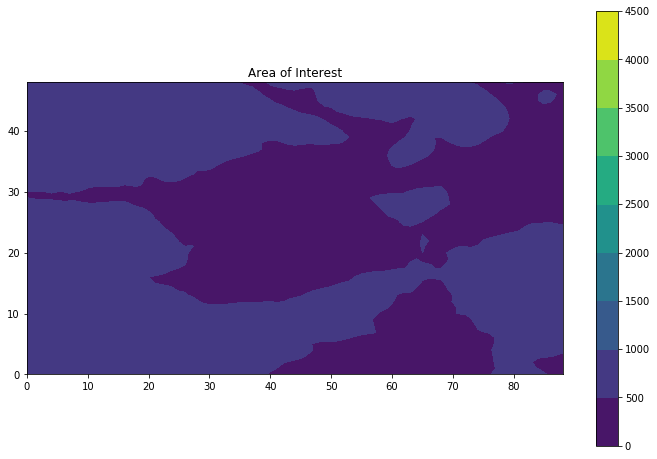

In [5]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis",
            levels = list(range(0, 5000, 500)))
plt.title("Area of Interest")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [54]:
np.save("./Outputs/dem", data_array)

# Create 3D Map

In [40]:
# Sources: 
# http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_3d/

from scipy import misc 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib._png import read_png
import matplotlib.image as mpimg 
import cv2

In [41]:
ny, nx = data_array.shape
print(ny, nx)

49 89


In [42]:
# Create the x and y bounds 
x = np.arange(0, nx)
y = np.arange(0, ny)
x,y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]))

In [43]:
# Create 2D ararys for the x, y coordinates 
xv, yv = np.meshgrid(x,y)
xv, yv

(array([[ 0,  1,  2, ..., 86, 87, 88],
        [ 0,  1,  2, ..., 86, 87, 88],
        [ 0,  1,  2, ..., 86, 87, 88],
        ...,
        [ 0,  1,  2, ..., 86, 87, 88],
        [ 0,  1,  2, ..., 86, 87, 88],
        [ 0,  1,  2, ..., 86, 87, 88]]),
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [46, 46, 46, ..., 46, 46, 46],
        [47, 47, 47, ..., 47, 47, 47],
        [48, 48, 48, ..., 48, 48, 48]]))

(49, 89, 4)


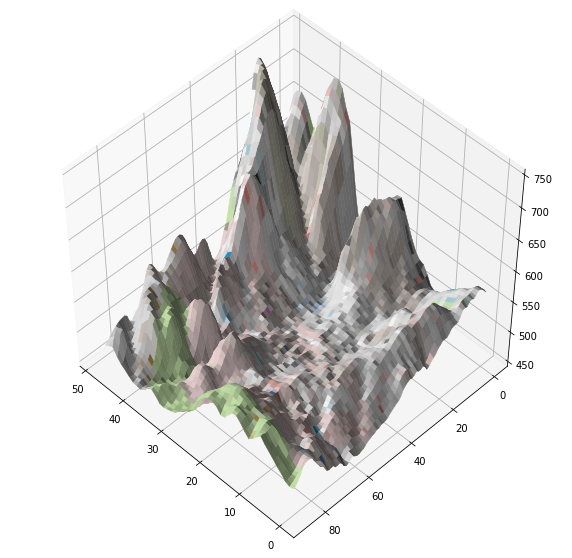

In [53]:
# Create the surface plot using x,y,z 
fig = plt.figure(figsize=(10, 10.))

img = mpimg.imread('base.png')
img = cv2.resize(img, (300, 300))


start_y = 150
start_x = 150

img = img[start_y:start_y+ny, start_x:start_x+nx, :]

print(img.shape)

x, y = np.mgrid[0:img.shape[0], 0:img.shape[1]]

ax = plt.gca(projection='3d')

ax.plot_surface(x, y, data_array, 
                rstride=1, cstride=1, facecolors=img, 
                linewidth=0.5, antialiased=True)
ax.view_init(elev=50., azim=135)
plt.show()